### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
def replace_low_freq(df, threshold=100, replacement='other'):
    s = df.stack()
    c = s.value_counts()
    m = pd.Series(replacement, c.index[c <= threshold])
    return s.replace(m).unstack()


In [5]:
# Importing dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [6]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [7]:
#remove spaces from column names
columns = []
for col in leads.columns:
    columns.append(col.title().replace(" ", ""))
    
leads.columns = columns
# print(leads.columns)
leads.head()

,ProspectId,LeadNumber,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,Totalvisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,...,GetUpdatesOnDmContent,LeadProfile,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AsymmetriqueActivityScore,AsymmetriqueProfileScore,IAgreeToPayTheAmountThroughCheque,AFreeCopyOfMasteringTheInterview,LastNotableActivity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
leads.replace('Select', np.NAN, inplace=True)

In [9]:
# Checking the percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

ProspectId                                0.00
LeadNumber                                0.00
LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
Totalvisits                               1.48
TotalTimeSpentOnWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Country                                  26.63
Specialization                           36.58
HowDidYouHearAboutXEducation             78.46
WhatIsYourCurrentOccupation              29.11
WhatMattersMostToYouInChoosingACourse    29.32
Search                                    0.00
Magazine                                  0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvert

In [10]:
leads.LeadQuality.value_counts(normalize=True)

Might be             0.348759
Not Sure             0.244131
High in Relevance    0.142410
Worst                0.134362
Low in Relevance     0.130338
Name: LeadQuality, dtype: float64

In [11]:
# removing columns with high null values and index numbers 
leadsData = leads.drop(['LeadProfile', 'HowDidYouHearAboutXEducation', 'LeadNumber', 'ProspectId', 'LeadQuality'], axis=1)

In [12]:
# Let's check the dimensions of the dataframe
leadsData.shape

(9240, 32)

In [13]:
# Let's see the type of each column
leadsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   LeadOrigin                             9240 non-null   object 
 1   LeadSource                             9204 non-null   object 
 2   DoNotEmail                             9240 non-null   object 
 3   DoNotCall                              9240 non-null   object 
 4   Converted                              9240 non-null   int64  
 5   Totalvisits                            9103 non-null   float64
 6   TotalTimeSpentOnWebsite                9240 non-null   int64  
 7   PageViewsPerVisit                      9103 non-null   float64
 8   LastActivity                           9137 non-null   object 
 9   Country                                6779 non-null   object 
 10  Specialization                         5860 non-null   object 
 11  What

In [14]:
# let's look at the statistical aspects of the dataframe
leadsData.describe()

,Converted,Totalvisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,AsymmetriqueActivityScore,AsymmetriqueProfileScore
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [15]:
# Checking the percentage of missing values
round(100*(leadsData.isnull().sum()/len(leadsData.index)), 2)

LeadOrigin                                0.00
LeadSource                                0.39
DoNotEmail                                0.00
DoNotCall                                 0.00
Converted                                 0.00
Totalvisits                               1.48
TotalTimeSpentOnWebsite                   0.00
PageViewsPerVisit                         1.48
LastActivity                              1.11
Country                                  26.63
Specialization                           36.58
WhatIsYourCurrentOccupation              29.11
WhatMattersMostToYouInChoosingACourse    29.32
Search                                    0.00
Magazine                                  0.00
NewspaperArticle                          0.00
XEducationForums                          0.00
Newspaper                                 0.00
DigitalAdvertisement                      0.00
ThroughRecommendations                    0.00
ReceiveMoreUpdatesAboutOurCourses         0.00
Tags         

#### Specialization has 36.58% null values. However, we are not dropping this column. We are assigning the value to 'NotSpecified'. The specialization can be an important field since company may want to pitch relavant courses to indiviuals according to their domain. 

In [16]:
leadsData.Specialization.fillna('NotSpecified', inplace=True)
leadsData.Specialization.value_counts(normalize=True)*100

NotSpecified                         36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [17]:
leadsData.Tags.value_counts(dropna=False, normalize=True)

NaN                                                  0.362879
Will revert after reading the email                  0.224242
Ringing                                              0.130195
Interested in other courses                          0.055519
Already a student                                    0.050325
Closed by Horizzon                                   0.038745
switched off                                         0.025974
Busy                                                 0.020130
Lost to EINS                                         0.018939
Not doing further education                          0.015693
Interested  in full time MBA                         0.012662
Graduation in progress                               0.012013
invalid number                                       0.008983
Diploma holder (Not Eligible)                        0.006818
wrong number given                                   0.005087
opp hangup                                           0.003571
number n

In [18]:
# drop tags column
leadsData.drop('Tags', axis=1, inplace=True)
leadsData.head()

,LeadOrigin,LeadSource,DoNotEmail,DoNotCall,Converted,Totalvisits,TotalTimeSpentOnWebsite,PageViewsPerVisit,LastActivity,Country,...,UpdateMeOnSupplyChainContent,GetUpdatesOnDmContent,City,AsymmetriqueActivityIndex,AsymmetriqueProfileIndex,AsymmetriqueActivityScore,AsymmetriqueProfileScore,IAgreeToPayTheAmountThroughCheque,AFreeCopyOfMasteringTheInterview,LastNotableActivity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [19]:
leadsData.AsymmetriqueProfileIndex.value_counts(dropna=False, normalize=True)

NaN          0.456494
02.Medium    0.301732
01.High      0.238420
03.Low       0.003355
Name: AsymmetriqueProfileIndex, dtype: float64

In [20]:
leadsData.AsymmetriqueActivityIndex.value_counts(dropna=False, normalize=True)

NaN          0.456494
02.Medium    0.415476
01.High      0.088853
03.Low       0.039177
Name: AsymmetriqueActivityIndex, dtype: float64

In [21]:
# drop custom calculated indexes as these have high null values and can be derived from other parameters
leadsData.drop(['AsymmetriqueActivityIndex', 'AsymmetriqueActivityScore', 'AsymmetriqueProfileIndex', 'AsymmetriqueProfileScore'], axis=1, inplace=True)

In [22]:
leadsData.City.value_counts(dropna=False, normalize=True)

NaN                            0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [23]:
leadsData.City.fillna('NotSpecified',inplace=True )

cityCount = leadsData.groupby('City')['Converted'].value_counts().reset_index(name='count')
cityCount

,City,Converted,count
0,Mumbai,0,1913
1,Mumbai,1,1309
2,NotSpecified,0,2412
3,NotSpecified,1,1257
4,Other Cities,0,410
5,Other Cities,1,276
6,Other Cities of Maharashtra,0,256
7,Other Cities of Maharashtra,1,201
8,Other Metro Cities,0,225
9,Other Metro Cities,1,155


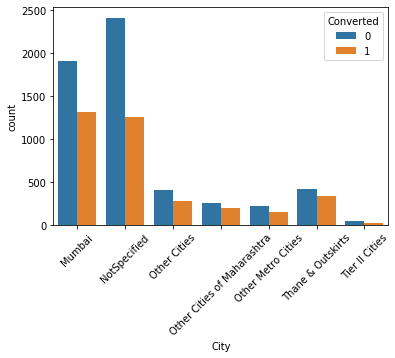

In [24]:
plt.xticks(rotation=45)
sns.barplot(x='City', y='count', hue='Converted', data = cityCount)

In [25]:
cityCount.loc[cityCount.City=='NotSpecified', 'count']/cityCount.loc[cityCount.City=='NotSpecified', 'count'].sum()

2    0.6574
3    0.3426
Name: count, dtype: float64

#### We are using the 'NotSpecified' category as the conversion rate and lead count is high

In [26]:
leadsData.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
Italy                      2
Ghana                      2
Belgium                    2
Philippines                2
Netherlands                2
Asia/Pacific Region        2
Bangladesh                 2
China                      2
Uganda                     2
Russia                     1
Tanzania                   1
Switzerland                1
Indonesia                  1
Kenya                      1
Denmark                    1
Vietnam       

In [27]:
leadsData.loc[(~(leadsData.Country=='India') & leadsData.Country.notnull()), 'Country'] ='Others'
100* leadsData.Country.value_counts(dropna=False, normalize=True)

India     70.259740
NaN       26.634199
Others     3.106061
Name: Country, dtype: float64

In [28]:
leadsData.Country.fillna('NotSpecified',inplace=True )

countryCount = leadsData.groupby('Country')['Converted'].value_counts().reset_index(name='count')
countryCount

,Country,Converted,count
0,India,0,4091
1,India,1,2401
2,NotSpecified,0,1385
3,NotSpecified,1,1076
4,Others,0,203
5,Others,1,84


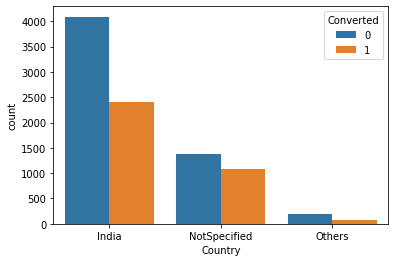

In [29]:
sns.barplot(x='Country', y='count', hue='Converted', data = countryCount)

In [30]:
countryCount.loc[countryCount.Country=='NotSpecified', 'count']/countryCount.loc[countryCount.Country=='NotSpecified', 'count'].sum()

2    0.562779
3    0.437221
Name: count, dtype: float64

#### We see that over 36% people chose not specify the country. However conversion rate is high for these people. We can use this as third category

In [31]:
leadsData.WhatIsYourCurrentOccupation.value_counts(normalize=True,dropna=False )*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: WhatIsYourCurrentOccupation, dtype: float64

In [32]:
leadsData.WhatIsYourCurrentOccupation.fillna('NotSpecified',inplace=True )

occupationCount = leadsData.groupby('WhatIsYourCurrentOccupation')['Converted'].value_counts().reset_index(name='count')
occupationCount

,WhatIsYourCurrentOccupation,Converted,count
0,Businessman,1,5
1,Businessman,0,3
2,Housewife,1,10
3,NotSpecified,0,2320
4,NotSpecified,1,370
5,Other,1,10
6,Other,0,6
7,Student,0,132
8,Student,1,78
9,Unemployed,0,3159


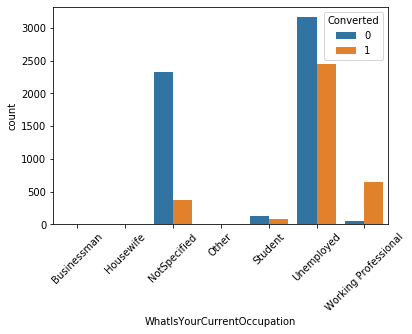

In [33]:
plt.xticks(rotation=45)
sns.barplot(x='WhatIsYourCurrentOccupation', y='count', hue='Converted', data = occupationCount)

In [34]:
occupationCount.loc[occupationCount.WhatIsYourCurrentOccupation=='NotSpecified', 'count']/occupationCount.loc[occupationCount.WhatIsYourCurrentOccupation=='NotSpecified', 'count'].sum()

3    0.862454
4    0.137546
Name: count, dtype: float64

In [35]:
occupationCount.loc[occupationCount.WhatIsYourCurrentOccupation=='Unemployed', 'count']/occupationCount.loc[occupationCount.WhatIsYourCurrentOccupation=='Unemployed', 'count'].sum()

9     0.564107
10    0.435893
Name: count, dtype: float64

#### Conversion rate for NotSpecified and Unemployed Is high. While working professionals have lowest conversion rate. 

In [36]:
leadsData.WhatMattersMostToYouInChoosingACourse.value_counts(normalize=True, dropna=False)

Better Career Prospects      0.706494
NaN                          0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: WhatMattersMostToYouInChoosingACourse, dtype: float64

#### This column is highly skewed. and has high null values. We can drop this 

In [37]:
leadsData.drop('WhatMattersMostToYouInChoosingACourse', axis=1,inplace=True)

In [38]:
leadsData.LastActivity.value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: LastActivity, dtype: int64

In [39]:
cols = ['LastActivity']
leadsData = replace_low_freq(leadsData[cols], 101).join(leadsData.drop(cols, 1))
leadsData.LastActivity.value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
other                         205
Form Submitted on Website     116
Name: LastActivity, dtype: int64

In [40]:
# leadsData.LeadSource.value_counts(normalize=True, dropna=False)
leadsData.LeadSource.value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             462
Welingak Website      129
Referral Sites        125
Facebook               39
NaN                    34
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
blog                    1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: LeadSource, dtype: int64

In [41]:
cols = ['LeadSource']
leadsData = replace_low_freq(leadsData[cols]).join(leadsData.drop(cols, 1))
leadsData.LeadSource.value_counts(dropna=False)

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            462
Welingak Website     129
Referral Sites       125
other                 67
Name: LeadSource, dtype: int64

In [42]:
leadsData.Totalvisits.describe(percentiles=[0, .25, .5, .75, .9, .95, .98, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
0%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
98%        13.000000
99%        17.000000
max       251.000000
Name: Totalvisits, dtype: float64

In [43]:
# we can compute null with the median value. mean and median are not very far apart. and number of visits have to be an iteger.
leadsData.loc[leadsData.Totalvisits.isnull(), 'Totalvisits'] = leadsData.Totalvisits.median()

In [44]:
leadsData.PageViewsPerVisit.describe(percentiles=[0, .25, .5, .75, .9, .95, .98, .99])

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
0%          0.000000
25%         1.000000
50%         2.000000
75%         3.200000
90%         5.000000
95%         6.000000
98%         8.000000
99%         9.000000
max        55.000000
Name: PageViewsPerVisit, dtype: float64

In [45]:
leadsData.PageViewsPerVisit.unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,  4.5 ,  3.33, 16.  , 12.  ,  1.71,   nan,  1.8 ,
        6.5 ,  4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,
        2.25,  3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,
        2.57,  2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,
        3.2 ,  1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,
        1.83,  3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,
        2.9 ,  1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,
        1.86,  2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,
        4.4 ,  3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,
        2.13,  2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,
        3.8 ,  1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

In [46]:
# we can compute null with the median value. mean and median are not very far apart. and number of visits have to be an iteger.
leadsData.loc[leadsData.PageViewsPerVisit.isnull(), 'PageViewsPerVisit'] = leadsData.PageViewsPerVisit.mean()

In [47]:
# Checking the percentage of missing values
round(100*(leadsData.isnull().sum()/len(leadsData.index)), 2)

LeadSource                           0.0
LastActivity                         0.0
LeadOrigin                           0.0
DoNotEmail                           0.0
DoNotCall                            0.0
Converted                            0.0
Totalvisits                          0.0
TotalTimeSpentOnWebsite              0.0
PageViewsPerVisit                    0.0
Country                              0.0
Specialization                       0.0
WhatIsYourCurrentOccupation          0.0
Search                               0.0
Magazine                             0.0
NewspaperArticle                     0.0
XEducationForums                     0.0
Newspaper                            0.0
DigitalAdvertisement                 0.0
ThroughRecommendations               0.0
ReceiveMoreUpdatesAboutOurCourses    0.0
UpdateMeOnSupplyChainContent         0.0
GetUpdatesOnDmContent                0.0
City                                 0.0
IAgreeToPayTheAmountThroughCheque    0.0
AFreeCopyOfMaste

In [48]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [49]:
# fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
# draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)